# A Change in Perspective for Predictive Modeling 
### Goodness of fit, train test split and bias variance tradeoff 

In [2]:
import scipy.stats as stats
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

## Predictive Modeling vs Inferential Modeling

Previously we have done statistical modeling with the intent to do inference on the resulting fit model. With predictive modeling the resulting structure of our model is simply a means to a predictive ends.

#### How did we decide if a model was good when we were attempting to do inferential statistics?

We made sure the model met all the assumptions of our linear regression then used the coefficients of our model to make claims about the world.

We also used $R^2$ to understand how much of the variance of our model was explained by our features. Even if we had a low $R^2$ we could still make claims about the world **if** our model assumptions held.

### Create a toy dataset to look at model assumptions for linear regression

In [3]:
SIZE = 10

noise = np.random.normal(0, 8, size=SIZE)
x = np.random.uniform(0, 10, size=SIZE)

intercept = 2

# y = m + b + some_noise
y = intercept + 4*x + noise

# reshape is necessary because there is only one feature
lr = LinearRegression()
lr.fit(x.reshape(-1, 1), y)

print(f'Intercept: {lr.intercept_:.2f} Coefficeint: {lr.coef_[0]:.2f} R2: {lr.score(x.reshape(-1, 1), y):.2f}')

Intercept: 3.67 Coefficeint: 3.92 R2: 0.73


**Python Tip:** using the variable:.2f syntax inside of an f-string allows you to format the output of the variable. Lets look at what happens when I remove the extra formatting syntax.

In [4]:
print(f'Intercept: {lr.intercept_} Coefficeint: {lr.coef_[0]} R2: {lr.score(x.reshape(-1, 1), y)}')

Intercept: 3.668565930809528 Coefficeint: 3.9191475944669802 R2: 0.7282869082398585


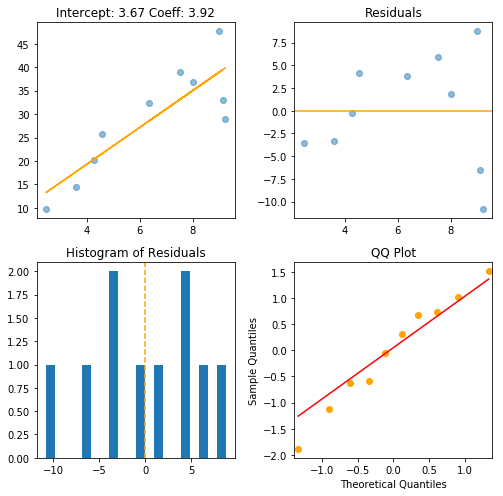

In [5]:
fig, ax = plt.subplots(2, 2, figsize=(7, 7))

# Data
ax[0, 0].scatter(x, y, alpha=.5)

# Model
pred = lr.predict(x.reshape(-1, 1))
ax[0, 0].plot(x, pred, color='orange')
ax[0, 0].set_title(f'Intercept: {lr.intercept_:.2f} Coeff: {lr.coef_[0]:.2f}')

#Residuals
residuals =  y - lr.predict(x.reshape(-1, 1))
ax[0, 1].scatter(x, residuals, alpha=.5)
ax[0, 1].axhline(0, color='orange')
ax[0, 1].set_title('Residuals')

# Histogram of Residuals
ax[1, 0].hist(residuals, bins=20)
ax[1, 0].axvline(residuals.mean(), linestyle='--', color='orange')
ax[1, 0].set_title('Histogram of Residuals')

# Q-Q plot
ax[1, 1].set_title('QQ Plot')
sm.qqplot(residuals, ax=ax[1, 1], fit=True, color='orange', line='q')

fig.tight_layout();

## What are some ways we can measure the goodness of a model if we only care about predictions?


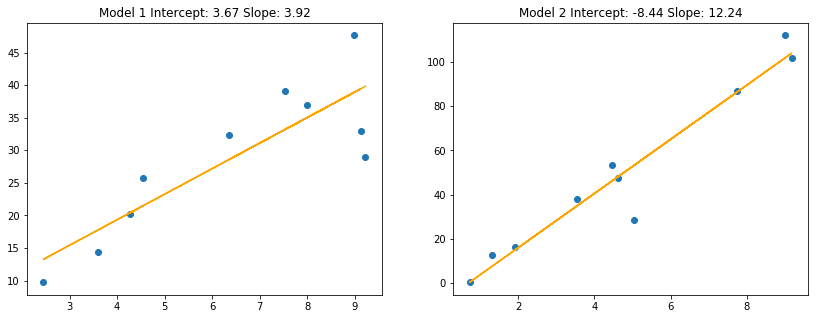

In [6]:
fig, axes = plt.subplots(ncols=2, figsize=(14, 5))

# linear model on a linear relationship
axes[0].scatter(x, y)
pred = lr.predict(x.reshape(-1, 1))
axes[0].plot(x, pred, color='orange')
axes[0].set_title(f'Model 1 Intercept: {lr.intercept_:.2f} Slope: {lr.coef_[0]:.2f}')

# linear model on an exponential relationship
SIZE = 10

noise = np.random.normal(0, 8, size=SIZE)
x2 = np.random.uniform(0, 10, size=SIZE)

intercept2 = 10

# y = m + b + some_noise
y2 = intercept2 + 1.3*x2**2 + noise

lr2 = LinearRegression()
lr2.fit(x2.reshape(-1,1), y2)

axes[1].scatter(x2, y2)
pred2 = lr2.predict(x2.reshape(-1, 1))

axes[1].plot(x2, pred2, color='orange')
axes[1].set_title(f'Model 2 Intercept: {lr2.intercept_:.2f} Slope: {lr2.coef_[0]:.2f}');

### Regression model metrics: Mean Squared Error and Mean Absolute Error

**CONCEPT CHECK: Why do we need to square or take the absolute value of the residuals?**

$$MSE=\frac{1}{n}\sum_{i=1}^n (y_{i} - \hat{y_{i}})^2$$

$$MAE=\frac{1}{n}\sum_{i=1}^n |y_{i} - \hat{y_{i}}|$$

Both of these metrics compare the true values of each observation with the predicted values. The difference between the two metrics comes from how negative values are delt with, absolute value or squaring. MSE punishes larger deviations from the true value proportionally more than with MAE. Both metrics are commonly used and mostly depends on the particular situation you are modeling. Lets take a look at the MSE and MAE for model 1 and model 2:

In [7]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

[Sklearn.metrics Docs](https://scikit-learn.org/stable/modules/model_evaluation.html#classification-metrics) includes many common metrics for regression, clustering and classification problems. We will just be using MAE and MSE

In [8]:
print('Model 1')
print(f'MAE: {mean_absolute_error(pred, y):.2f} MSE: {mean_squared_error(pred, y):.2f}')
print('------------------------')
print('Model 2')
print(f'MAE: {mean_absolute_error(pred2, y2):.2f} MSE: {mean_squared_error(pred2, y2):.2f}')

Model 1
MAE: 4.90 MSE: 32.95
------------------------
Model 2
MAE: 5.55 MSE: 81.78


One thing we notice here is that MSE always appears to be a lot higher than MAE. The reason for this is that MSE is actually in different units. Since we squared our values MSE is in units squared. For example, if we calculated MSE for our housing prices our value would be in squared dollars. It is fairly common to use root mean squared error (RMSE) instead of just MSE to see what the average error of our model is in the same units as we started.

This can calculated by taking the square root of mean_squared_error()

In [9]:
print('Model 1')
print(f'MAE: {mean_absolute_error(pred, y):.2f} RMSE: {np.sqrt(mean_squared_error(pred, y)):.2f}')
print('------------------------')
print('Model 2')
print(f'MAE: {mean_absolute_error(pred2, y2):.2f} RMSE: {np.sqrt(mean_squared_error(pred2, y2)):.2f}')

Model 1
MAE: 4.90 RMSE: 5.74
------------------------
Model 2
MAE: 5.55 RMSE: 9.04


## Objective function vs an Evaluation metric

The objective function is the function which the model is directly optimizing for which guides how the final fit model will look.

An evaluation function is the function which you use after the fitting to decide how good the model is.

These can be the same thing for example MSE is used as the objective function in linear regression and can also be used to evaluate the model afterwards.


## Adding complexity to our models: Polynomial Regression

Looking at model 2 we can see that there is a non-linear relationship between x and y. It looks like an exponential relationship so lets try to fit a polynomial 

In [10]:
from sklearn.preprocessing import PolynomialFeatures

# Instantiate our polynomial features object with degree of 2
pf = PolynomialFeatures(degree=2)

# Fit and transform our data
poly_data = pf.fit_transform(x2.reshape(-1, 1))

# Instantiate linear regression model and fit it to our transformed features
lr_poly = LinearRegression()
lr_poly.fit(poly_data, y2)

x_ = np.linspace(0, 10, num=100)
poly_x_ = pf.transform(x_.reshape(-1, 1))
poly_ = lr_poly.predict(poly_x_)

# Predict on data
poly_preds = lr_poly.predict(poly_data)

print('Polynomial Model with degree 2')
print(f'MAE: {mean_absolute_error(poly_preds, y2):.2f} RMSE: {np.sqrt(mean_squared_error(poly_preds, y2)):.2f}')

Polynomial Model with degree 2
MAE: 6.30 RMSE: 8.49


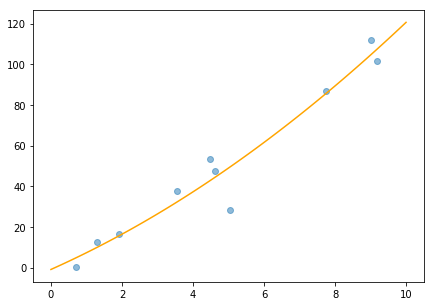

In [11]:
fig, ax = plt.subplots(figsize=(7, 5))

ax.scatter(x2, y2, alpha=.5)
ax.plot(x_, poly_, color='orange');

## More complexity?

This fit looks good but we are still getting some error. Maybe if we continue to add higher order polynomials we will continue to reduce our error

Polynomial Model with degree 1
MAE: 5.55 RMSE: 9.04
coefs: [12.24187059] -8.44
----------
Polynomial Model with degree 2
MAE: 6.30 RMSE: 8.49
coefs: [7.80067408 0.43543449] -0.85
----------
Polynomial Model with degree 5
MAE: 5.23 RMSE: 6.28
coefs: [-77.74183804  67.72357406 -19.88764252   2.42204557  -0.10330733] 30.33
----------
Polynomial Model with degree 10
MAE: 0.00 RMSE: 0.00
coefs: [-7.35902403e+02  4.03635160e+02  5.25491982e+02 -7.93114734e+02
  4.42774051e+02 -1.33401924e+02  2.35399166e+01 -2.43053097e+00
  1.35949404e-01 -3.18049092e-03] 268.54
----------


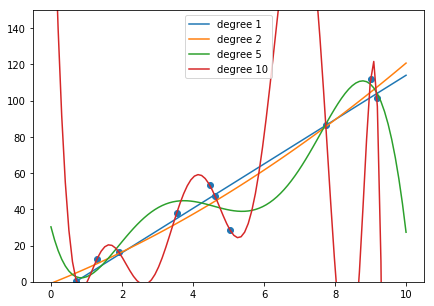

In [14]:
degrees = [1, 2, 5, 10]

fig, ax = plt.subplots(figsize=(7, 5))

ax.set_ylim(0, 150)

for degree in degrees:
    # Instantiate our polynomial features object with degree
    pf = PolynomialFeatures(degree=degree)

    # Fit and transform our data
    poly_data = pf.fit_transform(x2.reshape(-1, 1))

    # Instantiate linear regression model and fit it to our transformed features
    lr_poly = LinearRegression()
    lr_poly.fit(poly_data, y2)

    x_ = np.linspace(0, 10, num=100)
    poly_x_ = pf.transform(x_.reshape(-1, 1))
    poly_ = lr_poly.predict(poly_x_)

    # Predict on data
    poly_preds = lr_poly.predict(poly_data)
    
    # plot
    ax.plot(x_, poly_, label=f'degree {degree}')
    
    

    print(f'Polynomial Model with degree {degree}')
    print(f'MAE: {mean_absolute_error(poly_preds, y2):.2f} RMSE: {np.sqrt(mean_squared_error(poly_preds, y2)):.2f}\ncoefs: {lr_poly.coef_[1:]} {lr_poly.intercept_:.2f}')
    print('----------')
ax.scatter(x2, y2)
ax.legend();

As we increase the degree of our polynomial we continue to reduce our error, but the models that are being produced look wildly different. Which model would you say is the best?

## Error due to Bias and Error Due to Variance

Error due to Bias: The error due to bias is taken as the difference between the expected (or average) prediction of our model and the correct value which we are trying to predict. Of course you only have one model so talking about expected or average prediction values might seem a little strange. However, imagine you could repeat the whole model building process more than once: each time you gather new data and run a new analysis creating a new model. Due to randomness in the underlying data sets, the resulting models will have a range of predictions. Bias measures how far off in general these models' predictions are from the correct value.


Error due to Variance: The error due to variance is taken as the variability of a model prediction for a given data point. Again, imagine you can repeat the entire model building process multiple times. The variance is how much the predictions for a given point vary between different realizations of the model.

source: http://scott.fortmann-roe.com/docs/BiasVariance.html

#### High Bias Model: Degree 1 or linear model

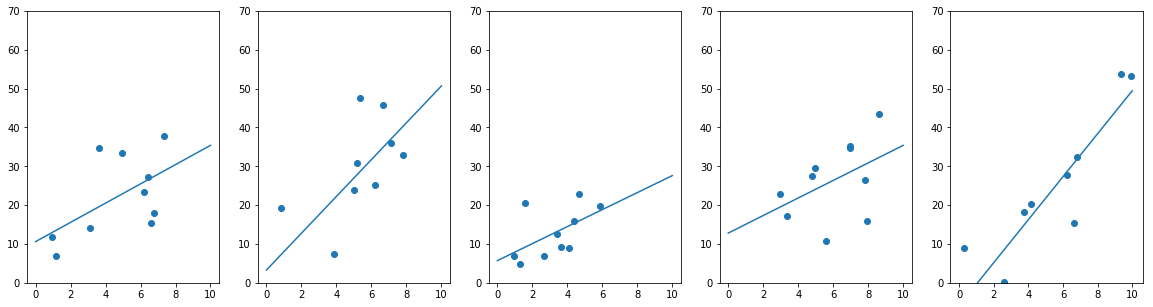

In [28]:
fig, axes = plt.subplots(ncols=5, figsize=(20, 5))

for ax in axes.flatten():
    SIZE = 10

    noise = np.random.normal(0, 8, size=SIZE)
    x = np.random.uniform(0, 10, size=SIZE)

    intercept = 2

    # y = m + b + some_noise
    y = intercept + 4*x + noise
    
    # Instantiate our polynomial features object with degree
    pf = PolynomialFeatures(degree=1)

    # Fit and transform our data
    poly_data = pf.fit_transform(x.reshape(-1, 1))

    # Instantiate linear regression model and fit it to our transformed features
    lr_poly = LinearRegression()
    lr_poly.fit(poly_data, y)

    x_ = np.linspace(0, 10, num=100)
    poly_x_ = pf.transform(x_.reshape(-1, 1))
    poly_ = lr_poly.predict(poly_x_)

    # Predict on data
    poly_preds = lr_poly.predict(poly_data)

    # plot
    ax.set_ylim(0, 70)
    ax.plot(x_, poly_, label=f'degree {degree}')
    ax.scatter(x, y)

#### High Variace Model: Degree 10

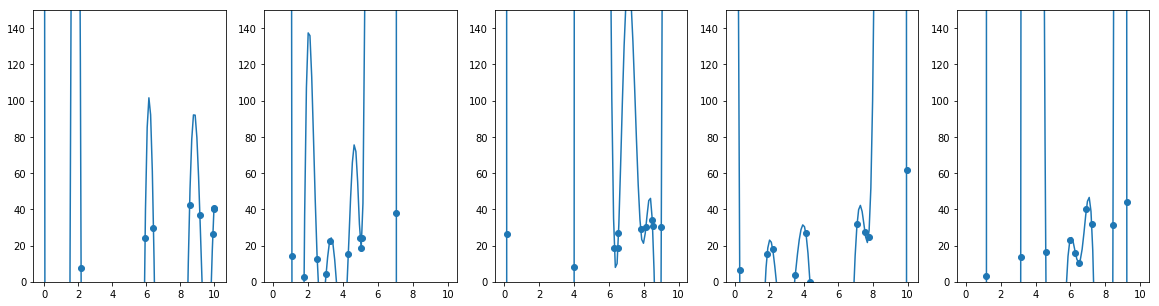

In [31]:
fig, axes = plt.subplots(ncols=5, figsize=(20, 5))

for ax in axes.flatten():
    SIZE = 10

    noise = np.random.normal(0, 8, size=SIZE)
    x = np.random.uniform(0, 10, size=SIZE)

    intercept = 2

    # y = m + b + some_noise
    y = intercept + 4*x + noise
    
    # Instantiate our polynomial features object with degree
    pf = PolynomialFeatures(degree=10)

    # Fit and transform our data
    poly_data = pf.fit_transform(x.reshape(-1, 1))

    # Instantiate linear regression model and fit it to our transformed features
    lr_poly = LinearRegression()
    lr_poly.fit(poly_data, y)

    x_ = np.linspace(0, 10, num=100)
    poly_x_ = pf.transform(x_.reshape(-1, 1))
    poly_ = lr_poly.predict(poly_x_)

    # Predict on data
    poly_preds = lr_poly.predict(poly_data)

    # plot
    ax.set_ylim(0, 150)
    ax.plot(x_, poly_, label=f'degree {degree}')
    ax.scatter(x, y)

## Overfitting and Underfitting: The train test split

The error that we have been calculating is known as the in sample error. This is the error from the predictions made on the data the model was trained on. While this number does give us some information the more important information comes from the out of sample error.

Out of sample error measures how badly a model will do on data that it has not been trained on. We can calculated this in many ways but the most simple method is to split our data into two parts, training and testing. We will fit our model on the training data and calculate our error on the testing set.

In [25]:
from sklearn.model_selection import train_test_split

from sklearn.datasets import load_boston

data = load_boston()

In [26]:
df = pd.DataFrame(data['data'], columns=data['feature_names'])

df['prices'] = data['target']

In [27]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,prices
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [28]:
X_train, X_test, y_train, y_test = train_test_split(df[['AGE', 'LSTAT', 'RM']], df[['prices']])

In [29]:
train_error = []
test_error = []

degrees = range(8)

for degree in degrees:
    pf = PolynomialFeatures(degree=degree)
    
    poly_train = pf.fit_transform(X_train)
    poly_test = pf.transform(X_test)

    # Instantiate linear regression model and fit it to our transformed features
    lr_poly = LinearRegression()
    lr_poly.fit(poly_train, y_train)
    
    train_preds = lr_poly.predict(pf.transform(X_train))
    test_preds = lr_poly.predict(pf.transform(X_test))
    
    train_RMSE = np.sqrt(mean_squared_error(train_preds, y_train))
    test_RMSE = np.sqrt(mean_squared_error(test_preds, y_test))
    
    train_error.append(train_RMSE)
    test_error.append(test_RMSE)

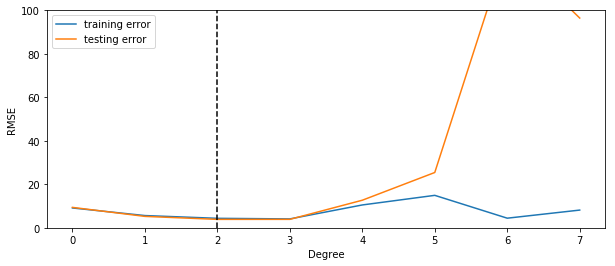

In [30]:
fig, ax = plt.subplots(figsize=(10, 4))

ax.set_ylim(0, 100)
ax.plot(degrees, train_error, label='training error')
ax.plot(degrees, test_error, label='testing error')
ax.axvline(degrees[np.argmin(test_error)], linestyle='--', color='black')
ax.set_xlabel('Degree')
ax.set_ylabel('RMSE')
ax.legend();

## Generalizing from our data

The training error continues to get smaller or remains low while as we increase the degree of the polynomials used the testing error explodes.

We can see that the lowest RMSE model that we looked at is not the most complex. When the model complexity becomes to high it will begin to fit to the noise in the data rather than the underlying signal and failing to be predictive on unseen data.

### Pitfalls of the train test split: Is this an accurate representation of how well our model will do in the future?

Maybe not. 
- We could be over fitting to our testing set
- The testing set may not be representative of future data
- Data leakage: we gave the model information about the future that it won't have with new data

**Every time we make modeling decisions based on our hold out set we increase the risk of overfitting to our data**